For the beginning of this lab we are going to look at implementing different distance metrics.

# You need to upload your completed notebook to the Github repo and also submit your Github repo link on Gradescope under Lab 2

# Exercise 1) Write Python functions for the three metrics (Euclidean, Manhattan and Minkowski):

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan(a, b):
    return np.sum(np.abs(a - b))

def minkowski(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

In [3]:
a = np.array([1, 2])
b = np.array([4, 6])

##For sample tests cases we expect
* Euclidean = 5
* Manhattan = 7
* Minkokski (p = 3) ~ 4.4979

In [4]:
assert euclidean(a, b) == 5
assert manhattan(a, b) == 7
assert minkowski(a, b, p=3) == 4.497941445275415

In [5]:
a = np.array([2, 3, 5])
b = np.array([2, 3, 5])

For identical points we expect
* Euclidean = 0.0
* Manhattan = 0.0
* Minkokski (p = 4) ~ 0.0

In [6]:
assert euclidean(a, b) == 0.0
assert manhattan(a, b) == 0.0
assert minkowski(a, b, p=3) == 0.0

#Exercise 2) In this part of the lab we will first be using the make_blobs method from sklearn.datasets, it creates for us an artificial dataset whereby we will inject outliers into our small dataset

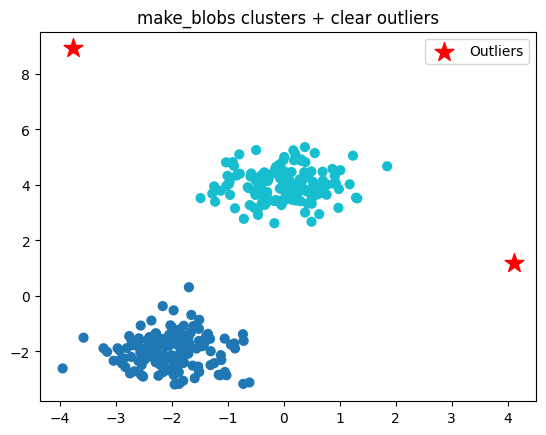

In [7]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

# --- 1) Make clustered data ---
X, y = make_blobs(n_samples=300,
                  centers=[(-2, -2), (0, 4)],
                  cluster_std=0.6,
                  random_state=42)

# --- 2) Inject outliers ---
n_outliers = 2
rng = np.random.RandomState(42)

# choose a wide box far outside clusters
X_outliers = rng.uniform(low=-12, high=10, size=(n_outliers, 2))


# combine
#X_full = np.vstack([X, X_outliers])
#y_full = np.hstack([y, [-1]*n_outliers])  # mark outliers as -1


# --- 3) Plot ---
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", s=40)
plt.scatter(X_outliers[:,0], X_outliers[:,1],
            c="red", marker="*", s=200, label="Outliers")
#plt.scatter(X_outliers[:, 0], X_outliers[:, 1], facecolors="none", edgecolors="red", s=120, linewidths=2, label="outliers")
plt.legend()
plt.title("make_blobs clusters + clear outliers")
plt.show()

#Our next tasks will be to use
* First calculate Euclidean distances between points
* In the next cell we will be calculating the cosine distance between points.

###**Hint:** We can use the pairwise distance function from sklearn and call the appropriate distance function

When looking at the plots, what kind of interpretations can you make, is euclidean or cosine better in this scenario? Which one seems to have a harder time with outliers?

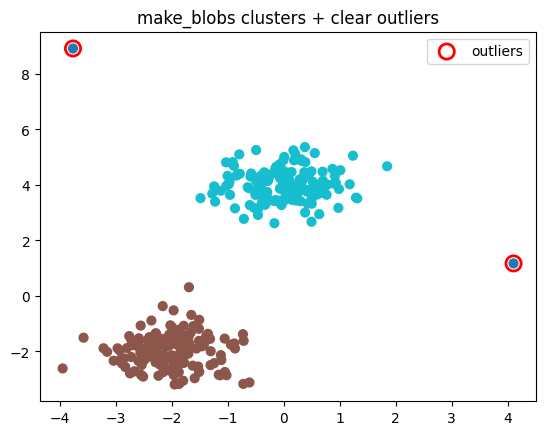

In [8]:
from sklearn.metrics import pairwise_distances

# --- 1) Make clustered data ---
X, y = make_blobs(n_samples=300,
                  centers=[(-2, -2), (0, 4)],
                  cluster_std=0.6,
                  random_state=42)

# --- 2) Inject outliers ---
n_outliers = 2
rng = np.random.RandomState(42)

# choose a wide box far outside clusters
X_outliers = rng.uniform(low=-12, high=10, size=(n_outliers, 2))


# combine
X_full = np.vstack([X, X_outliers])
y_full = np.hstack([y, [-1]*n_outliers])  # mark outliers as -1

# TO-DO
# --- Compute pairwise Euclidean distances ---
D = pairwise_distances(X_full, metric='euclidean')

# Distance profile: average distance to all other points
mean_dist = D.mean(axis=1)

# Identify potential outliers (top-2 by average distance)
outlier_indices = np.argsort(mean_dist)[-2:][::-1]

# --- 3) Plot ---
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, cmap="tab10", s=40)
plt.scatter(X_full[outlier_indices,0], X_full[outlier_indices,1],
            facecolors="none", edgecolors="red",
            s=120, linewidths=2, label="outliers")

plt.legend()
plt.title("make_blobs clusters + clear outliers")
plt.show()

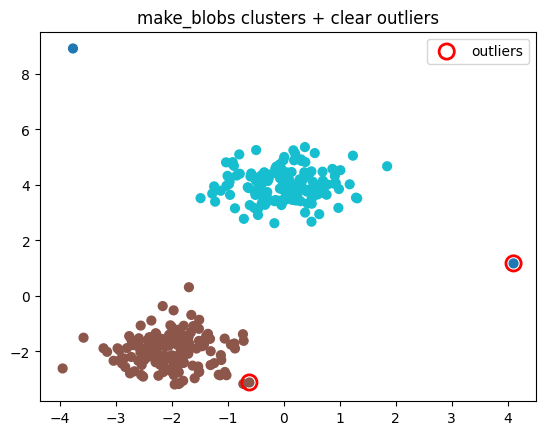

In [13]:
# --- 1) Make clustered data ---
X, y = make_blobs(n_samples=300,
                  centers=[(-2, -2), (0, 4)],
                  cluster_std=0.6,
                  random_state=42)

# --- 2) Inject outliers ---
n_outliers = 2
rng = np.random.RandomState(42)

# choose a wide box far outside clusters
X_outliers = rng.uniform(low=-12, high=10, size=(n_outliers, 2))


# combine
X_full = np.vstack([X, X_outliers])
y_full = np.hstack([y, [-1]*n_outliers])  # mark outliers as -1

# TO-DO
# --- Compute pairwise Cosine distances ---
D = pairwise_distances(X_full, metric='cosine')

# TO-DO
# Distance profile: average distance to all other points
mean_dist = D.mean(axis=1)

# TO-DO
# Identify potential outliers (top-2 by average distance)
outlier_indices = np.argsort(mean_dist)[-2:]

# --- 3) Plot ---
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, cmap="tab10", s=40)
#plt.scatter(X_full[outlier_indices,0], X_full[outlier_indices,1],
#            c="red", marker="*", s=200, label="Outliers")

plt.scatter(X_full[outlier_indices,0], X_full[outlier_indices,1],
            facecolors="none", edgecolors="red",
            s=120, linewidths=2, label="outliers")
plt.legend()
plt.title("make_blobs clusters + clear outliers")
plt.show()

#Exercise 3) In this part of the lab we will first be using the make_circle method from sklearn.datasets, it creates for us an artificial dataset whereby we will inject outliers into our small dataset

/var/folders/92/17wsy3w17n7clpr5vllyj3mc0000gn/T/ipykernel_34585/4061339648.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_full[:,0], X_full[:,1], c='red', cmap="coolwarm", s=20)


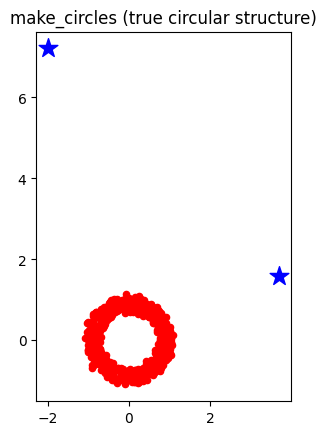

In [14]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.8, noise=0.05, random_state=42)




# --- 2) Inject outliers ---
n_outliers = 2
rng = np.random.RandomState(42)

# choose a wide box far outside clusters
X_outliers = rng.uniform(low=-8, high=8, size=(n_outliers, 2))

# combine
X_full = np.vstack([X, X_outliers])
y_full = np.hstack([y, [-1]*n_outliers])  # mark outliers as -1

plt.scatter(X_full[:,0], X_full[:,1], c='red', cmap="coolwarm", s=20)

plt.scatter(X_outliers[:,0], X_outliers[:,1],
            c="blue", marker="*", s=200, label="Outliers")

plt.gca().set_aspect("equal")
plt.title("make_circles (true circular structure)")
plt.show()

#Our next tasks will be to use
* First calculate Euclidean distances between points
* In the next cell we will be calculating the cosine distance between points.

###**Hint:** We can use the pairwise distance function from sklearn and call the appropriate distance function.
It's the same method we used previously

/var/folders/92/17wsy3w17n7clpr5vllyj3mc0000gn/T/ipykernel_34585/1071608555.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_full[:,0], X_full[:,1], c='blue', cmap="coolwarm", s=20)


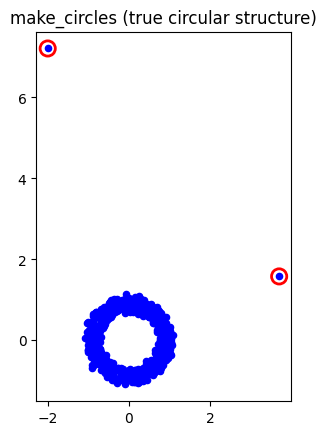

In [15]:
from sklearn.datasets import make_circles
from sklearn.metrics import pairwise_distances

X, y = make_circles(n_samples=500, factor=0.8, noise=0.05, random_state=42)




# --- 2) Inject outliers ---
n_outliers = 2
rng = np.random.RandomState(42)

# choose a wide box far outside clusters
X_outliers = rng.uniform(low=-8, high=8, size=(n_outliers, 2))

# combine
X_full = np.vstack([X, X_outliers])
y_full = np.hstack([y, [-1]*n_outliers])  # mark outliers as -1

# TO-DO
# --- Compute pairwise Euclidean distances ---
D = pairwise_distances(X_full, metric='euclidean')

# TO-DO
# Distance profile: average distance to all other points
mean_dist = D.mean(axis=1)

# TO-DO
# Identify potential outliers (top-2 by average distance)
outlier_indices = np.argsort(mean_dist)[-2:]

plt.scatter(X_full[:,0], X_full[:,1], c='blue', cmap="coolwarm", s=20)

#plt.scatter(X_full[outlier_indices,0], X_full[outlier_indices,1],
#            c="blue", marker="*", s=200, label="Outliers")

plt.scatter(X_full[outlier_indices,0], X_full[outlier_indices,1],
            facecolors="none", edgecolors="red",
            s=120, linewidths=2, label="outliers")


plt.gca().set_aspect("equal")
plt.title("make_circles (true circular structure)")
plt.show()

/var/folders/92/17wsy3w17n7clpr5vllyj3mc0000gn/T/ipykernel_34585/1392341695.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_full[:,0], X_full[:,1], c='blue', cmap="coolwarm", s=20)


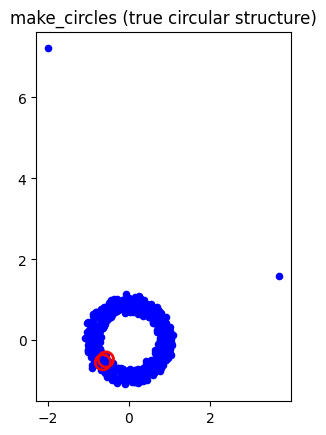

In [17]:
X, y = make_circles(n_samples=500, factor=0.8, noise=0.05, random_state=42)




# --- 2) Inject outliers ---
n_outliers = 2
rng = np.random.RandomState(42)

# choose a wide box far outside clusters
X_outliers = rng.uniform(low=-8, high=8, size=(n_outliers, 2))

# combine
X_full = np.vstack([X, X_outliers])
y_full = np.hstack([y, [-1]*n_outliers])  # mark outliers as -1

# TO-DO
# --- Compute pairwise Cosine distances ---
D = pairwise_distances(X_full, metric='cosine')

# TO-DO
# Distance profile: average distance to all other points
mean_dist = D.mean(axis=1)

# TO-DO
# Identify potential outliers (top-2 by average distance)
outlier_indices = np.argsort(mean_dist)[-2:]

plt.scatter(X_full[:,0], X_full[:,1], c='blue', cmap="coolwarm", s=20)

plt.scatter(X_full[outlier_indices,0], X_full[outlier_indices,1],
            facecolors="none", edgecolors="red",
            s=120, linewidths=2, label="outliers")

plt.gca().set_aspect("equal")
plt.title("make_circles (true circular structure)")
plt.show()

#Exercise 4) In this part of the lab we will first be using numpy to create a set of points in a line, we will inject outliers into our small dataset

/var/folders/92/17wsy3w17n7clpr5vllyj3mc0000gn/T/ipykernel_34585/51576638.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


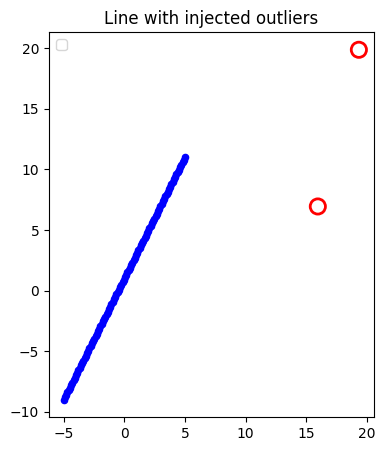

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Points along a line y = 2x + 1 ---
n_points = 100
xs = np.linspace(-5, 5, n_points)
ys = 2 * xs + 1
line_points = np.column_stack((xs, ys))

# --- 2. Add outliers ---
n_outliers = 2
rng = np.random.default_rng(42)
outliers = rng.uniform(low=[-15, -15], high=[25, 35], size=(n_outliers, 2))

# --- 3. Combine ---
X = np.vstack([line_points, outliers])
labels = np.array([0]*len(line_points) + [-1]*len(outliers))  # mark outliers as -1

# --- 4. Visualize ---
plt.figure(figsize=(7,5))
plt.scatter(line_points[:,0], line_points[:,1], c="blue", s=20)
plt.scatter(outliers[:,0], outliers[:,1], facecolors="none", edgecolors="red",
            s=120, linewidths=2)
plt.legend()
plt.gca().set_aspect("equal")
plt.title("Line with injected outliers")
plt.show()


#Our next tasks will be to use
* First calculate Euclidean distances between points
* In the next cell we will be calculating the cosine distance between points.

###**Hint:** We can use the pairwise distance function from sklearn and call the appropriate distance function.
It's the same method we used previously

/var/folders/92/17wsy3w17n7clpr5vllyj3mc0000gn/T/ipykernel_34585/1883768585.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


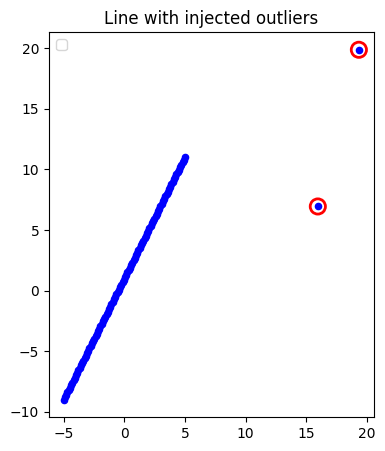

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Points along a line y = 2x + 1 ---
n_points = 100
xs = np.linspace(-5, 5, n_points)
ys = 2 * xs + 1
line_points = np.column_stack((xs, ys))

# --- 2. Add outliers ---
n_outliers = 2
rng = np.random.default_rng(42)
outliers = rng.uniform(low=[-15, -15], high=[25, 35], size=(n_outliers, 2))

# --- 3. Combine ---
X = np.vstack([line_points, outliers])
labels = np.array([0]*len(line_points) + [-1]*len(outliers))  # mark outliers as -1

# TO-DO
# --- Compute pairwise Euclidean distances ---
D = pairwise_distances(X, metric='euclidean')

# TO-DO
# Distance profile: average distance to all other points
mean_dist = D.mean(axis=1)

# TO-DO
# Identify potential outliers (top-2 by average distance)
outlier_indices = np.argsort(mean_dist)[-2:]

# --- 4. Visualize ---
plt.figure(figsize=(7,5))
#plt.scatter(line_points[:,0], line_points[:,1], c="blue", s=20)
plt.scatter(X[:,0], X[:,1], c="blue", s=20)
plt.scatter(X[outlier_indices,0], X[outlier_indices,1], facecolors="none", edgecolors="red",
            s=120, linewidths=2)
plt.legend()
plt.gca().set_aspect("equal")
plt.title("Line with injected outliers")
plt.show()

/var/folders/92/17wsy3w17n7clpr5vllyj3mc0000gn/T/ipykernel_34585/2025266877.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


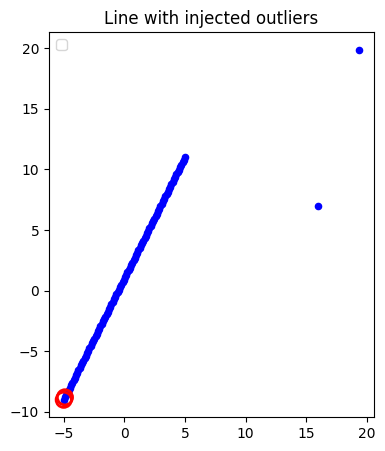

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Points along a line y = 2x + 1 ---
n_points = 100
xs = np.linspace(-5, 5, n_points)
ys = 2 * xs + 1
line_points = np.column_stack((xs, ys))

# --- 2. Add outliers ---
n_outliers = 2
rng = np.random.default_rng(42)
outliers = rng.uniform(low=[-15, -15], high=[25, 35], size=(n_outliers, 2))

# --- 3. Combine ---
X = np.vstack([line_points, outliers])
labels = np.array([0]*len(line_points) + [-1]*len(outliers))  # mark outliers as -1

# TO-DO
# --- Compute pairwise Cosine distances ---
D = pairwise_distances(X, metric='cosine')

# TO-DO
# Distance profile: average distance to all other points
mean_dist = D.mean(axis=1)

# TO-DO
# Identify potential outliers (top-2 by average distance)
outlier_indices = np.argsort(mean_dist)[-2:]

# --- 4. Visualize ---
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c="blue", s=20)
plt.scatter(X[outlier_indices,0], X[outlier_indices,1], facecolors="none", edgecolors="red",
            s=120, linewidths=2)
plt.legend()
plt.gca().set_aspect("equal")
plt.title("Line with injected outliers")
plt.show()

In the previous cells we have seen that cosine distance can struggle at times with low dimensional data, however with higher dimensional data like text/image embeddings it can perform better

#Exercise 5) In this first cell we will be calculating the cosine and euclidean distances for some simulated image data, we will see that cosine distance is more robust to variations in the data

In [23]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

rng = np.random.default_rng(0)

# Simulate 512-d image embeddings
# Image A: a "reference image"
img_A = rng.normal(size=(1, 512))

# Image B: same class (embedding points in nearly the same direction, scaled)
img_B = img_A * 5.0 + rng.normal(scale=0.01, size=(1, 512))

# Image C: different class (independent random vector)
img_C = rng.normal(size=(1, 512))

X = np.vstack([img_A, img_B, img_C])

# Compute cosine vs Euclidean distances
cos_dist = cosine_distances(X)
euc_dist = euclidean_distances(X)

print("Cosine distance matrix:\n", np.round(cos_dist, 3))
print("\nEuclidean distance matrix:\n", np.round(euc_dist, 3))


Cosine distance matrix:
 [[0.    0.    1.038]
 [0.    0.    1.038]
 [1.038 1.038 0.   ]]

Euclidean distance matrix:
 [[  0.     91.421  33.023]
 [ 91.421   0.    117.424]
 [ 33.023 117.424   0.   ]]


# In this first cell we will be calculating the cosine and euclidean distances for some simulated text document data, we will see that cosine distance is more robust to variations in the data.

TF-IDF simply refers to term frequency - inverse document frequency. It’s a statistical measure used in text mining and information retrieval to evaluate how important a word is to a document in a collection (corpus).

In [24]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

# Imagine TF–IDF style vectors for documents
doc_short = np.array([[1, 2, 3]])        # small vector
doc_long  = np.array([[10, 20, 30]])     # same proportions, larger magnitude

# Add a different document
doc_diff  = np.array([[1, 0, 0]])        # very different direction

X = np.vstack([doc_short, doc_long, doc_diff])

# TO-DO
# Compute distances
cos_dist = cosine_distances(X)
euc_dist = euclidean_distances(X)

print("Cosine distance:\n", cos_dist)
print("\nEuclidean distance:\n", euc_dist)

Cosine distance:
 [[0.         0.         0.73273876]
 [0.         0.         0.73273876]
 [0.73273876 0.73273876 0.        ]]

Euclidean distance:
 [[ 0.         33.67491648  3.60555128]
 [33.67491648  0.         37.16180835]
 [ 3.60555128 37.16180835  0.        ]]


#Exercise 6) Here we will be exploring a real world dataset from sklearn called the Breast-Cancer dataset from Wisconsin, it is a classic, real-world dataset that comes bundled for practice with classification tasks.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import pairwise_distances

# --- Load dataset ---
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)

cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Our task will simply be about exploring some of the features of the dataset, namely the area error and mean area, and looking at it their are any data outliers.

### We will be again calculating the
* Euclidean distance in the cell below
* The next cell will be the cosine distance


Top 5 outliers by mean distance: [ 82 352 180 212 461]


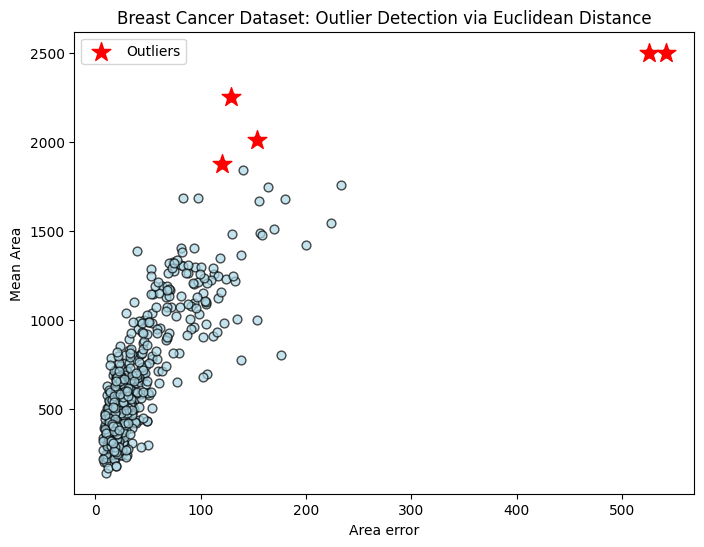

In [26]:
# Use only two features: mean radius and mean area
X2 = X[['area error', 'mean area']].values

# TO-DO
# --- Compute pairwise Euclidean distances ---
D = pairwise_distances(X2, metric='euclidean')

# TO-DO
# Distance profile: average distance to all other points
mean_dist = D.mean(axis=1)

# TO-DO
# Identify potential outliers (top-5 by average distance)
outlier_indices = np.argsort(mean_dist)[-5:]
print("Top 5 outliers by mean distance:", outlier_indices)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1], c="lightblue", s=40, edgecolor="k", alpha=0.7)
plt.scatter(X2[outlier_indices,0], X2[outlier_indices,1],
            c="red", marker="*", s=200, label="Outliers")
plt.xlabel("Area error")
plt.ylabel("Mean Area")
plt.title("Breast Cancer Dataset: Outlier Detection via Euclidean Distance")
plt.legend()
plt.show()


Top 5 outliers by mean distance: [152 258 212 461 417]


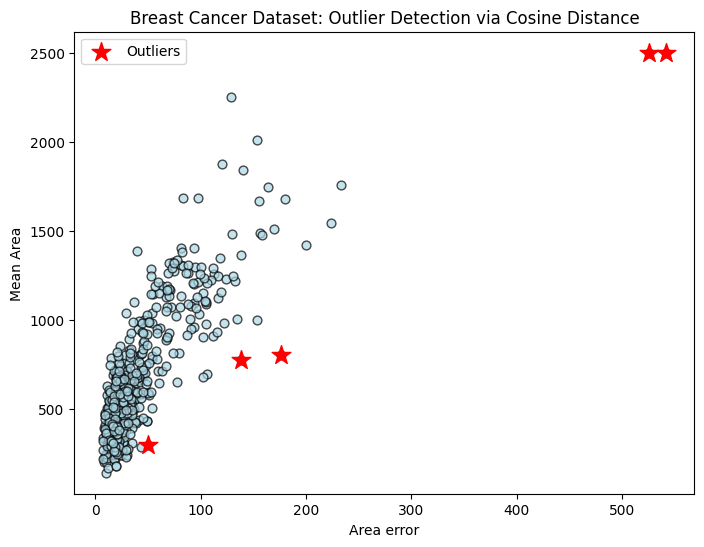

In [27]:
# --- Compute pairwise Cosine distances ---
D = pairwise_distances(X2, metric='cosine')

# TO-DO
# Distance profile: average distance to all other points
mean_dist = D.mean(axis=1)

# TO-DO
# Identify potential outliers (top-5 by average distance)
outlier_indices = np.argsort(mean_dist)[-5:]
print("Top 5 outliers by mean distance:", outlier_indices)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1], c="lightblue", s=40, edgecolor="k", alpha=0.7)
plt.scatter(X2[outlier_indices,0], X2[outlier_indices,1],
            c="red", marker="*", s=200, label="Outliers")
plt.xlabel("Area error")
plt.ylabel("Mean Area")
plt.title("Breast Cancer Dataset: Outlier Detection via Cosine Distance")
plt.legend()
plt.show()


## Exercise 7) Here we simply look at a heatmap of different distance functions and seeing any patterns we observe with the data.    
  
  
<br>

### What are some of your observation about these heatmaps? Are some plots similar to others, additionally, does any of the heatmaps appear to struggle with detecting any similairty between the distances of a large amount of points?

Distance matrix shape: (50, 50)


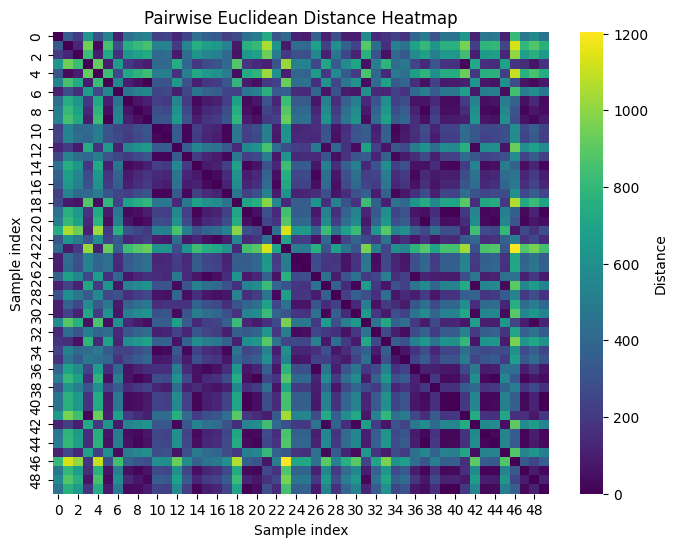

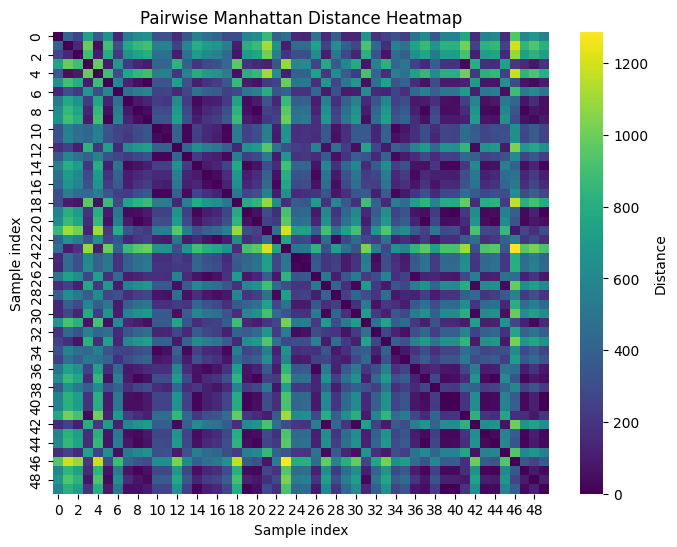

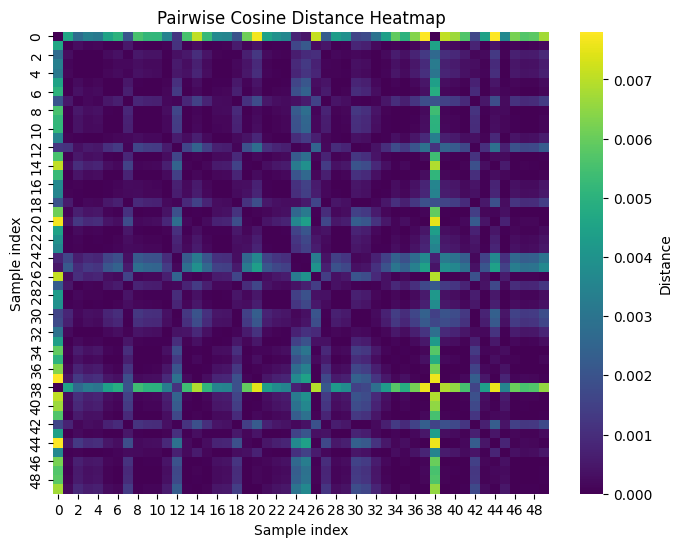

In [29]:
import seaborn as sns

# Select just two features
X2 = X[['area error', 'mean area']].values
X2 = X2[:50,:]

# TO-DO
# --- Compute pairwise distances ---
D_euclidean = pairwise_distances(X2, metric='euclidean')
D_manhattan = pairwise_distances(X2, metric='manhattan')
D_cosine    = pairwise_distances(X2, metric='cosine')

print("Distance matrix shape:", D_euclidean.shape)  # (569, 569)

# --- Heatmap plotting function ---
def plot_heatmap(D, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(D, cmap="viridis", cbar_kws={'label': 'Distance'})
    plt.title(title)
    plt.xlabel("Sample index")
    plt.ylabel("Sample index")
    plt.show()

# Plot heatmaps for each metric
plot_heatmap(D_euclidean, "Pairwise Euclidean Distance Heatmap")
plot_heatmap(D_manhattan, "Pairwise Manhattan Distance Heatmap")
plot_heatmap(D_cosine,    "Pairwise Cosine Distance Heatmap")


This cell we are exploring the different clusters in the dataset. We use the K-Mean clustering algorithm that we will be exploring in lectures soon. K-Means is one of the most popular unsupervised learning algorithms for clustering data into groups based on similarity.

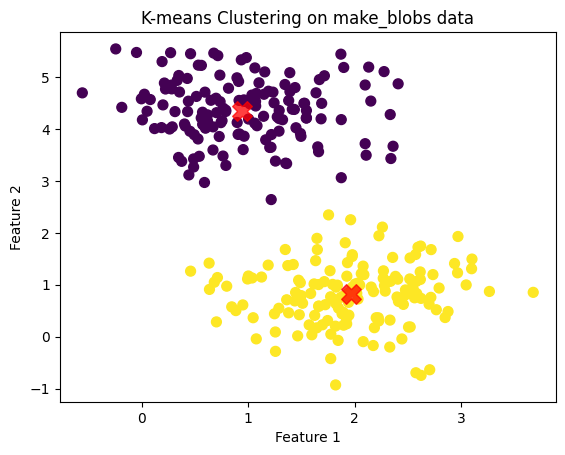

In [30]:
from sklearn.datasets import make_blobs
# Generate data

X, y = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto') # n_init='auto' for modern versions
kmeans.fit(X)
labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering on make_blobs data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()